# Affine Transformation of 2-d polygons

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from math import cos, sin, radians
%matplotlib inline
from ipywidgets import interactive, interact
import ipywidgets as widgets

In [2]:
# function to create the polygon
# N = number of vertices
# t_x, t_y = translation along x and y axes
# theta = rotation angle

def create_poly(N=3,t_x=0.0,t_y=0.0,theta=0):
    np.random.seed(1)
    patches = []
    xy = np.random.rand(N,2)*10
    #print('xy_original:\n',xy) 
    
    # for translation
    translate_by = np.array([t_x, t_y])
    
    # for rotation
    cos_th = cos(radians(theta))
    sin_th = sin(radians(theta))
    rotation_matrix = np.array([[cos_th, -1*sin_th],[sin_th, cos_th]])
    
    #translation and rotation
    xy_transformed = np.dot((xy + translate_by),rotation_matrix)
    print('xy_transformed:\n',xy_transformed)
    
    # make polygon
    polygon = Polygon(xy_transformed, True) # Connected vertices = True or False
    patches.append(polygon)
    
    # plot figure
    fig, ax = plt.subplots()
    p = PatchCollection(patches,alpha=0.2)
    ax.add_collection(p)
    plt.axis('square')
    plt.xlim(-15.0,15.0)
    plt.ylim(-15.0,15.0)
    plt.grid()
    return patches

## Plot the polygon

### No transformations

xy_transformed:
 [[  4.17022005e+00   7.20324493e+00]
 [  1.14374817e-03   3.02332573e+00]
 [  1.46755891e+00   9.23385948e-01]]


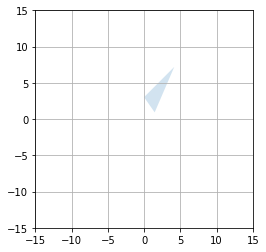

In [3]:
# plot the polygon
patches = create_poly()

### Translate the polygon

xy_transformed:
 [[ 5.07022005  7.70324493]
 [ 0.90114375  3.52332573]
 [ 2.36755891  1.42338595]]


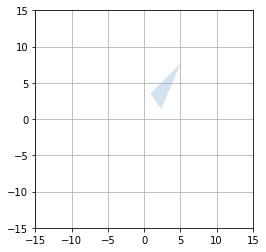

In [4]:
# translate the polygon
t_x = 0.9
t_y = 0.5
patches = create_poly(3,t_x,t_y)


### Do a rotation

xy_transformed:
 [[ 8.32330313 -0.00989403]
 [ 2.61884876  1.51067235]
 [ 1.53345514 -0.80925032]]


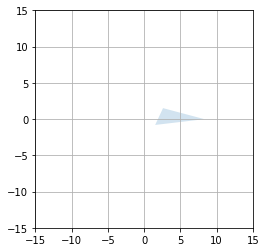

In [5]:
theta = 60; t_x = 0. ; t_y = 0.
patches = create_poly(3,t_x,t_y,theta)

## Interactive plot widget animation

In [6]:
# Interactive plot
interactive_plot = interactive(create_poly, N=(3,10,1), t_x=(-5.,5.,0.1),t_y=(-5.,5.,0.1), theta=(0,360,10))
# avoid flickering
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot

A Jupyter Widget

# References
1. [Polygon creation](https://matplotlib.org/search.html?q=Circles%2C%20Wedges%20and%20Polygons&check_keywords=yes&area=default)
3. [iPython widgets](https://ipywidgets.readthedocs.io/en/stable/)

In [7]:
widgets.Dropdown(
    options=['1', '2', '3'],
    value='2',
    description='Number:',
    disabled=False,
)

A Jupyter Widget

In [8]:

widgets.RadioButtons(
    options=['pepperoni', 'pineapple', 'anchovies'],
#     value='pineapple',
    description='Pizza topping:',
    disabled=False
)

A Jupyter Widget

In [9]:
widgets.Select(
    options=['Linux', 'Windows', 'OSX'],
    value='OSX',
    # rows=10,
    description='OS:',
    disabled=False
)

A Jupyter Widget

In [10]:
widgets.ToggleButtons(
    options=['Slow', 'Regular', 'Fast'],
    description='Speed:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
#     icons=['check'] * 3
)

A Jupyter Widget

In [11]:
widgets.SelectMultiple(
    options=['Apples', 'Oranges', 'Pears'],
    value=['Oranges'],
    #rows=10,
    description='Fruits',
    disabled=False
)

A Jupyter Widget

In [12]:
widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)

A Jupyter Widget

In [13]:
color = widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False
)

In [14]:
accordion = widgets.Accordion(children=[widgets.IntSlider(), widgets.Text(),color])
accordion.set_title(0, 'Slider')
accordion.set_title(1, 'Text')
accordion.set_title(2, 'Colour')
accordion

A Jupyter Widget

In [15]:
widgets.Checkbox(
    value=False,
    description='Check me',
    disabled=False
)

A Jupyter Widget

In [16]:
from ipywidgets import Layout, Button, Box

items = [
    Button(description='weight=1'),
    Button(description='weight=2', layout=Layout(flex='2 1 auto', width='auto')),
    Button(description='weight=1'),
 ]

box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    border='solid',
                    width='50%')
box = Box(children=items, layout=box_layout)
box

A Jupyter Widget

In [17]:
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider, FloatSlider

form_item_layout = Layout(
    display='flex-grow',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([Label(value='Age of the captain'), IntSlider(min=40, max=60)], layout=form_item_layout),
    Box([Label(value='Egg style'),
         Dropdown(options=['Scrambled', 'Sunny side up', 'Over easy'])], layout=form_item_layout),
    Box([Label(value='Ship size'),
         FloatText()], layout=form_item_layout),
    Box([Label(value='Information'),
         Textarea()], layout=form_item_layout)
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
form

A Jupyter Widget

In [18]:
from IPython.display import display
def f(a, b):
    display(a + b)
    return a+b

In [19]:
w = interactive(f, a=10, b=20)
w

A Jupyter Widget

In [20]:
a = widgets.IntSlider()
b = widgets.IntSlider()
c = widgets.IntSlider()
ui = widgets.HBox([a, b, c])
def f(a, b, c):
    print((a, b, c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

display(ui, out)

A Jupyter Widget

A Jupyter Widget

In [21]:
x_widget = FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)

def update_x_range(*args):
    x_widget.max = 2.0 * y_widget.value
y_widget.observe(update_x_range, 'value')

def printer(x, y):
    print(x, y)
interact(printer,x=x_widget, y=y_widget);

A Jupyter Widget

In [32]:
w = widgets.Text(
    value='Type your filename',
    #placeholder='Type something',
    description='Input filename:',
    disabled=False, 
    style={'description_width': 'initial'}
)
w

A Jupyter Widget

In [34]:
w.value

'test.txt'